In [ ]:
! pip install kaggle

In [ ]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jayaprakashpondy/pancreatic-ct-images

Dataset URL: https://www.kaggle.com/datasets/jayaprakashpondy/pancreatic-ct-images
License(s): CC0-1.0
pancreatic-ct-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Replace 'dataset.zip' with the name of your zip file
with zipfile.ZipFile('pancreatic-ct-images.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


In [ ]:
train ='/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

Found 800 images belonging to 1 classes.
Found 199 images belonging to 1 classes.
Epoch 1/20
25/25 [==============================] - 20s 659ms/step - loss: 0.0334 - accuracy: 0.9750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 10s 422ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 11s 458ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 11s 438ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 13s 511ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 10s 406ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
25/25

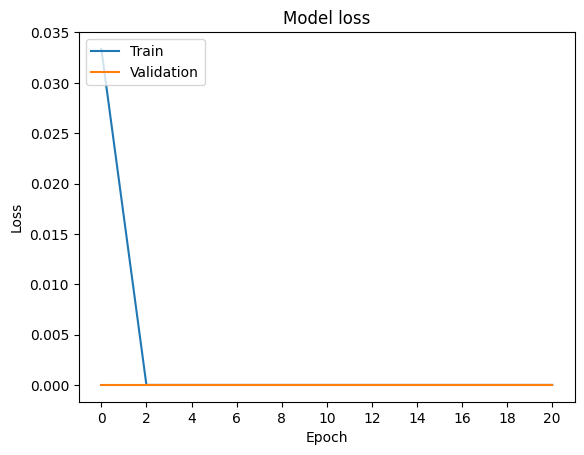

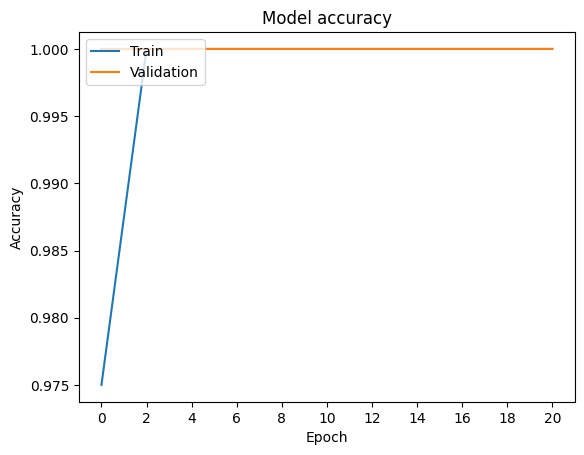

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

#Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
LEARNING_RATE = 0.001 # Fixed learning rate

train_dir = '/content/dataset/DATASET/train'
test_dir = '/content/dataset/DATASET/test'

#Data preprocessing and augmentation for training and validation data
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
brightness_range=[0.8, 1.2],
horizontal_flip=True,
validation_split=0.2
)

#Load training data
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=IMAGE_SIZE,
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training' # specify subset as 'training'
)

#Load validation data
validation_generator = train_datagen.flow_from_directory(
train_dir,
target_size=IMAGE_SIZE,
batch_size=BATCH_SIZE,
class_mode='binary',
subset='validation' # specify subset as 'validation'
)

#CNN model implementation
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dense(512, activation='relu'),
Dense(1, activation='sigmoid')
])

#Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(
train_generator,
steps_per_epoch=train_generator.samples // BATCH_SIZE,
epochs=20,
validation_data=validation_generator,
validation_steps=validation_generator.samples // BATCH_SIZE
)
import matplotlib.pyplot as plt

#Assuming 'history' is a variable that contains the training history of your model
#Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11]) # Adjusting the slicing to match the range
plt.plot(range(0, 21, 2), history.history['val_loss'][:11]) # Adjusting the slicing to match the range
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11]) # Adjusting the slicing to match the range
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11]) # Adjusting the slicing to match the range
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [ ]:

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=IMAGE_SIZE,
batch_size=BATCH_SIZE,
class_mode='binary',
shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

NameError: name 'test_datagen' is not defined

In [ ]:
# CNN WIHOUT AUGUMENATION
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate


train ='/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'


# Data preprocessing and augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# CNN model implementation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)
import matplotlib.pyplot as plt

# Ensure that 'history' contains enough data for the given range
# Plot training & validation loss values
plt.plot(range(0, 20, 2), history.history['loss'][:10])  # Only take first 10 elements
plt.plot(range(0, 20, 2), history.history['val_loss'][:10])  # Only take first 10 elements
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 20, 2))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 20, 2), history.history['accuracy'][:10])  # Only take first 10 elements
plt.plot(range(0, 20, 2), history.history['val_accuracy'][:10])  # Only take first 10 elements
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 20, 2))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


**MLP WITH *AUGMENTATION* **



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train ='/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing and augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# MLP model implementation
model = Sequential([
    Flatten(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),  # Flatten the input
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#MLP WITHOUT AUGMENTATION
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train ='/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing and augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# MLP model implementation
model = Sequential([
    Flatten(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),  # Flatten the input
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#resnet50 with augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # ResNet-50's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing and augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # ResNet50 base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#resnet50 without augumentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # ResNet-50's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing and augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # ResNet50 base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#inception v3 with augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (299, 299)  # InceptionV3's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate
train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing without augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # InceptionV3 base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#inception v3 without augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (299, 299)  # InceptionV3's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing without augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # InceptionV3 base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#desnet121 with augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # DenseNet121's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained DenseNet121 model without the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # DenseNet121 base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Data preprocessing without augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

# Load test data
test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#desnet121 without augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # DenseNet121's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing without augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained DenseNet121 model without the top (fully connected) layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # DenseNet121 base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#mobilenet with augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # MobileNet's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing without augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained MobileNet model without the top (fully connected) layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # MobileNet base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#mobile50 without augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # MobileNet's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing without augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained MobileNet model without the top (fully connected) layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # MobileNet base model
    GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#vgg19 with augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # VGG19's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing without augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained VGG19 model without the top (fully connected) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # VGG19 base model
    Flatten(),  # Flatten the output of the base model
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
#vgg19 without augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)  # VGG19's default input size
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # Fixed learning rate

train = '/content/dataset/DATASET/train/train'
test = '/content/dataset/DATASET/test/test'

# Data preprocessing without augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained VGG19 model without the top (fully connected) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,  # VGG19 base model
    Flatten(),  # Flatten the output of the base model
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

import matplotlib.pyplot as plt

# Assuming 'history' is a variable that contains the training history of your model

# Plot training & validation loss values
plt.plot(range(0, 21, 2), history.history['loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_loss'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(range(0, 21, 2), history.history['accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.plot(range(0, 21, 2), history.history['val_accuracy'][:11])  # Adjusting to match the range 0-20 with steps of 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(0, 21, 2))  # Including the 0 and stepping by 2
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    test,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming it's a binary classification task
    shuffle=False  # Do not shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
model.save('model.h5')